# Requirements

* [NumPy](https://numpy.org/)
* [SciPy](https://www.scipy.org/install.html)
* [Scikit-learn](https://scikit-learn.org/stable/)
* [Matplotlib](https://matplotlib.org/)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import _data_loader
from _data_loader import *
from _data_loader import _X, _convert_lifetime, _x_symlog


c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


# Read and plot multiple datasets
### List all *a? files in directory

In [2]:
# _dir = r'.\Z isomer'  # directory to read

_dir = r'C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\Projects\2019-Bilirubin project\TS\Femto\Sadegh\XBM 388 PP'  # directory to read

groups = get_groups(_dir)
groups

[['C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\2019-Bilirubin project\\TS\\Femto\\Sadegh\\XBM 388 PP\\2018_10_24_XBM_pp_388 nm2_10ps.a0',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\2019-Bilirubin project\\TS\\Femto\\Sadegh\\XBM 388 PP\\2018_10_24_XBM_pp_388 nm2_10ps.a1',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\2019-Bilirubin project\\TS\\Femto\\Sadegh\\XBM 388 PP\\2018_10_24_XBM_pp_388 nm2_10ps.a2',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\2019-Bilirubin project\\TS\\Femto\\Sadegh\\XBM 388 PP\\2018_10_24_XBM_pp_388 nm2_10ps.a3',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\2019-Bilirubin project\\TS\\Femto\\Sadegh\\XBM 388 PP\\2018_10_24_XBM_pp_388 nm2_10ps.a4',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\2019-Bilirubin project\\TS\\Femto\\Sadegh\\XBM 388 PP\\2018_10_24_XBM_pp_388 nm2_10ps.a5'],
 ['C:\\Us

### Plot all data

C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\Projects\Python scripts\Femto spectra\_data_loader.py:111: RuntimeWarning: invalid value encountered in double_scalars
  w = np.abs(zmin / diff)  # white color point set to zero z value
c:\users\dominik\appdata\local\programs\python\python37\lib\site-packages\matplotlib\colors.py:421: RuntimeWarning: invalid value encountered in less
  if (np.diff(x) < 0).any():


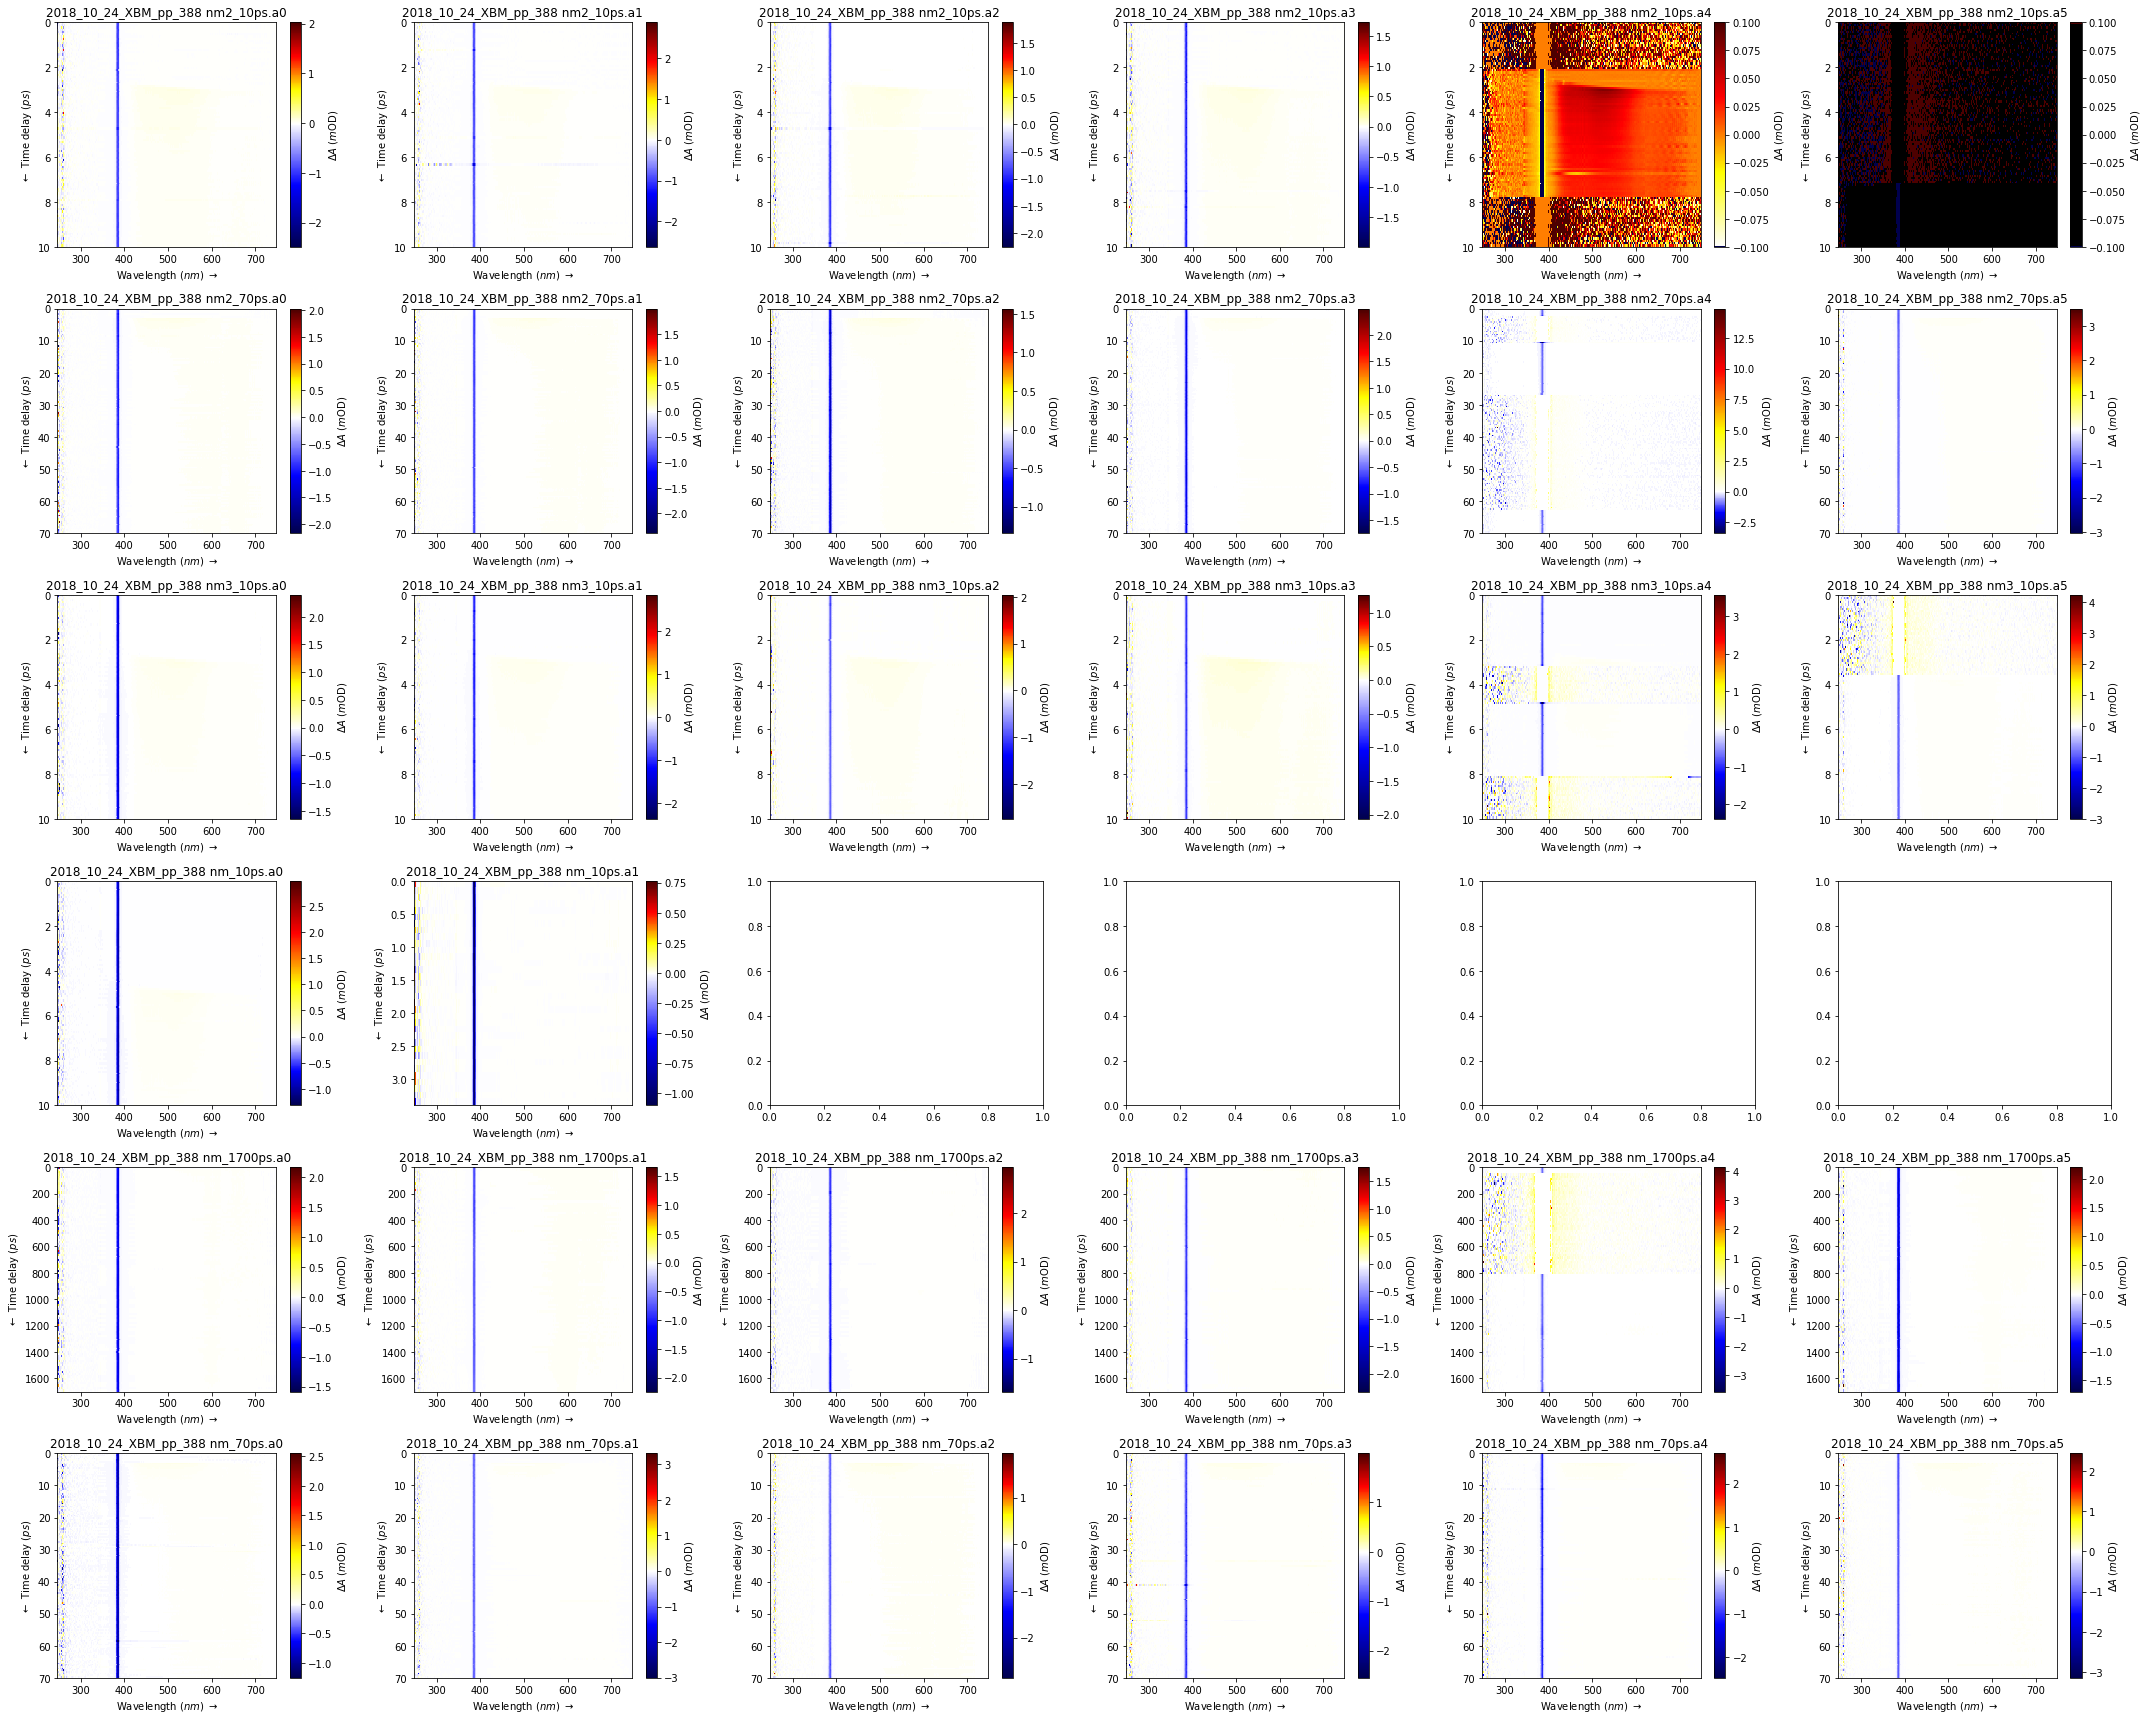

In [3]:
data = load_groups(groups)
plot_matrix(data)

### Select data

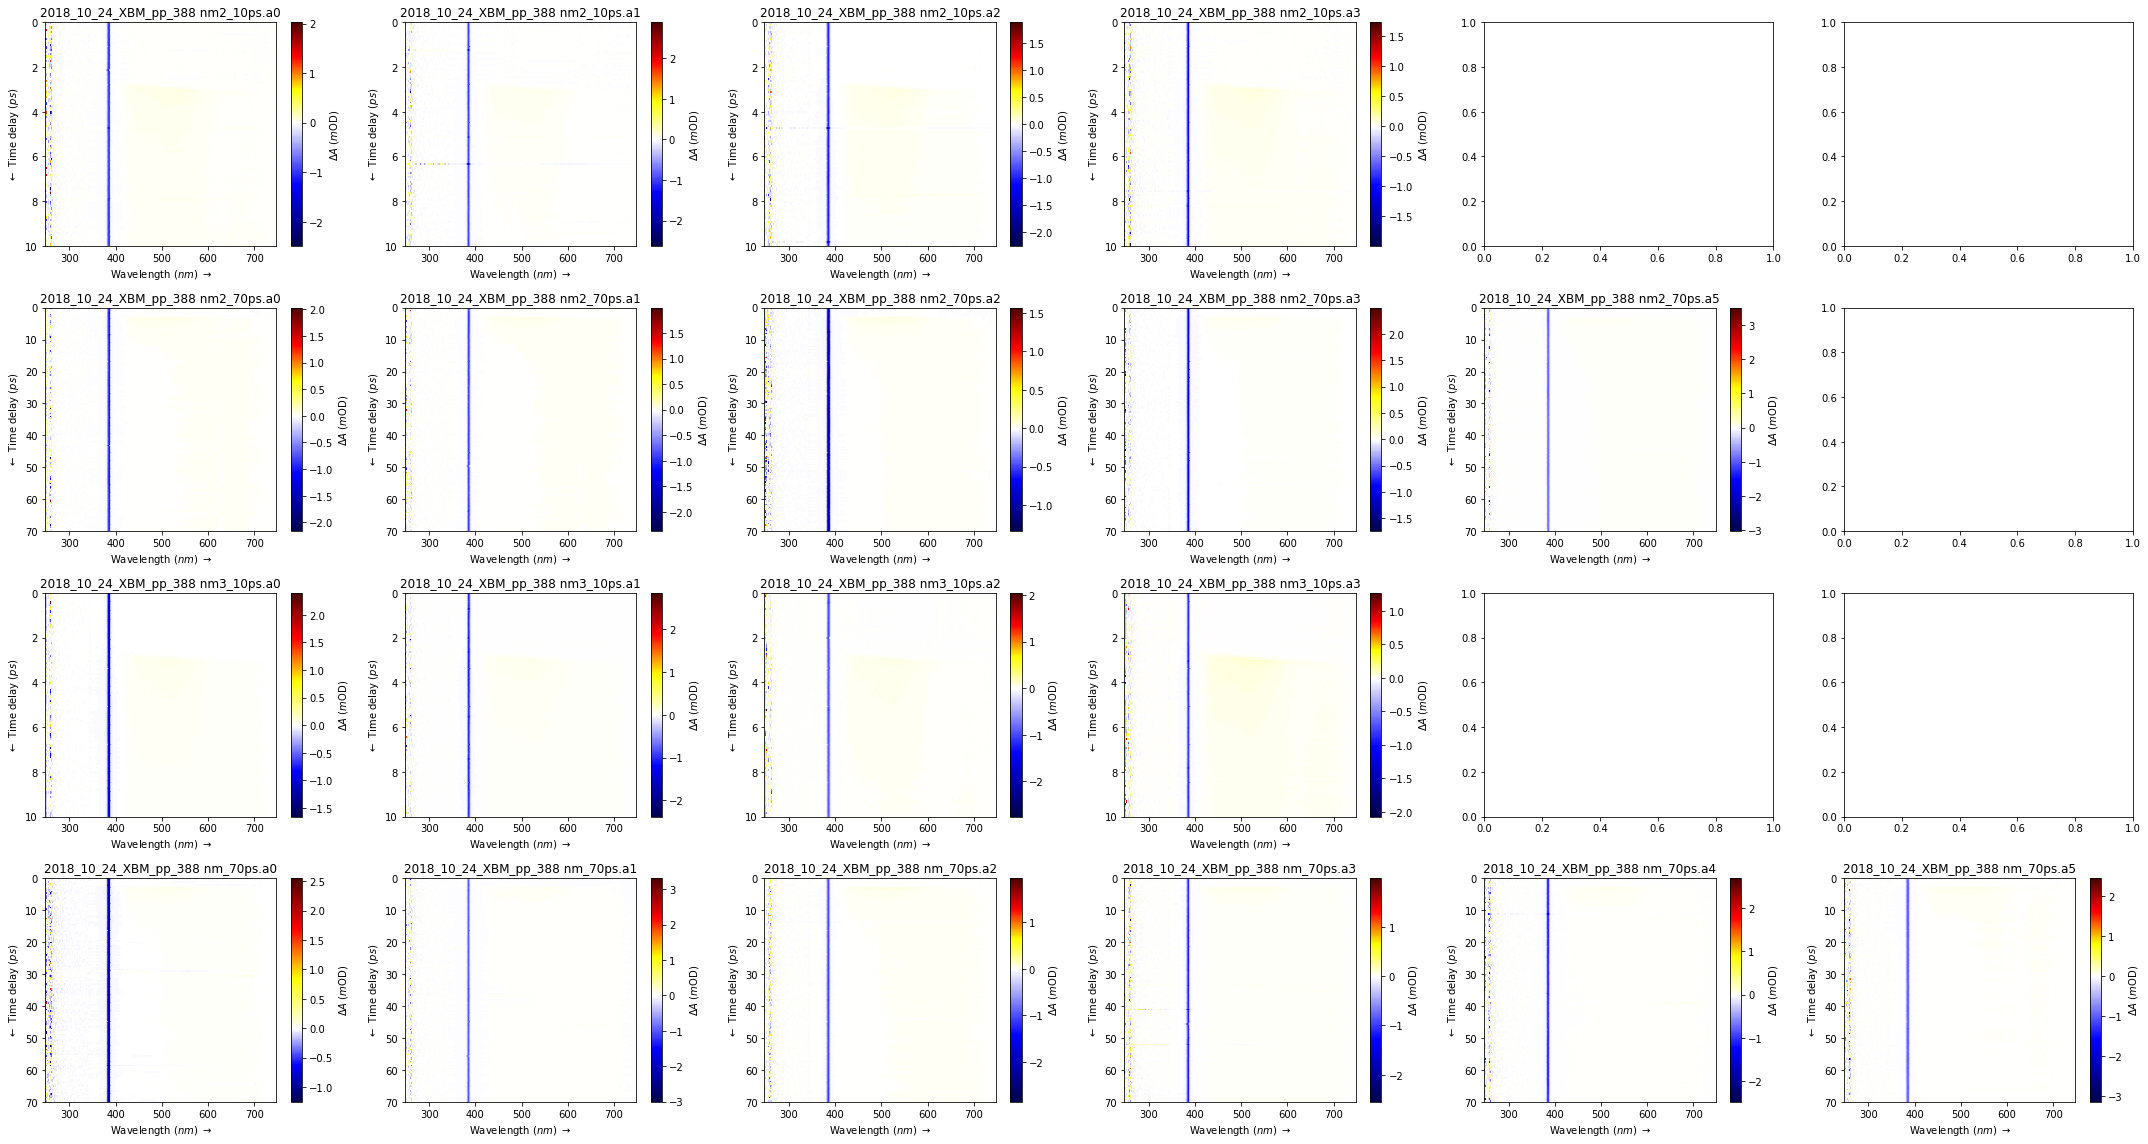

In [3]:
# select only datasets that consists of more than 5 measurements, i.e. file a0 - a5
g1 = get_groups(_dir, condition=lambda grp_len: grp_len > 3)

# plot_matrix(data)
# del g1[1][3]
# # del g1[3][5]
# g1 =  g1[:3]
del g1[0][-2:]
del g1[1][4]
del g1[2][-2:]

del g1[3]
# del g1[3][4]



g1
data = load_groups(g1)

plot_matrix(data)


## Average datasets

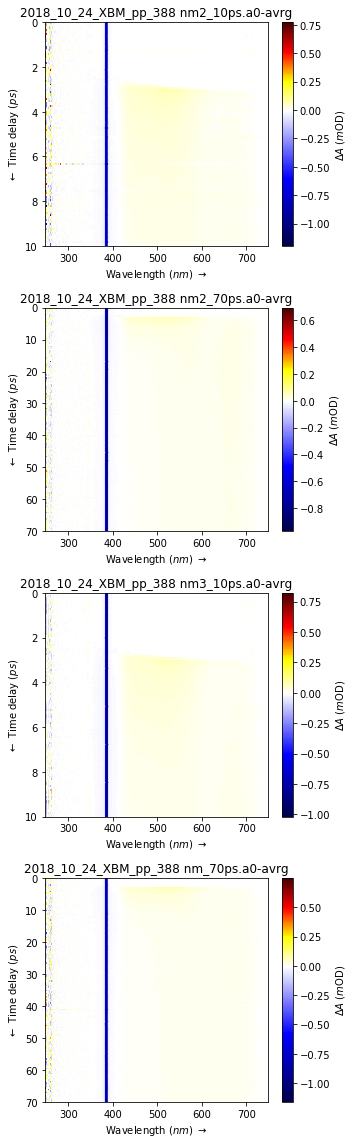

In [4]:
data_avrg = average(data)

plot_matrix(data_avrg)

# Merge datasets and plot

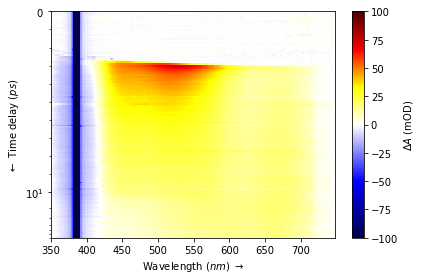

In [5]:
final_data = merge(data_avrg)

plot_data(final_data, D_mul_factor=1e3, symlog=True, z_lim=(-100, 100), t_lim=(None, None), w_lim=(350, None), fig_size=(6, 4),
          cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=10, linscale=3)

# Save data to Glotaran

In [ ]:

fname='[filename]'

save_matrix_to_Glotaran(final_data, fname=f'{fname}-GLOTARAN.ascii')
save_matrix(final_data, delimiter=',', fname=f'{fname}.csv', w0=350, w1=650)

# Baseline correction [optional]

In [ ]:
final_data = baseline_corr(final_data, t0=0, t1=1)

plot_data(final_data, D_mul_factor=1e3, symlog=True, z_lim=(-50, None), t_lim=(None, None), w_lim=(None, None), fig_size=(6, 4),
          cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=10, linscale=3)


# Load matrix from file [optional]

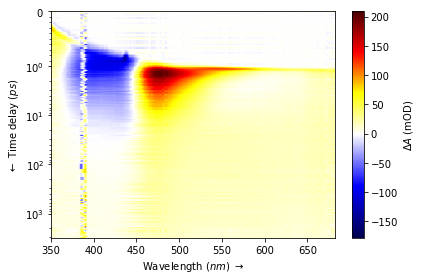

In [5]:
### ! CHANGE THE FILENAME OF YOUR DATA HERE !
fname = '2019_03_26_E isomer_MeOH_With Filter.csv'

data = Data(fname, delimiter=',', skiprows=0, t_axis_mul=1, transpose=True)


plot_data(data, D_mul_factor=1e3, symlog=True, z_lim=(None, None), t_lim=(None, None), w_lim=(350, None), fig_size=(6, 4),
          cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=1, linscale=1)

# Chirp Correction

$$\mu(\lambda) = \mu_0 + \sum_{i=1}^{nparmu}\mu_i\left(\frac{\lambda - \lambda_c}{100}\right)^i$$

$\mu(\lambda)$ describes the position of IRF, $\lambda_c$ is central wave (usually the excitation wavelength as used in Glotaran), $\mu_0$ is time zero at central wave (parameter *irf1* from Glotaran), $\mu_i$ are then parameters describing the dispersion (parameters *Parmu* from Glotaran)

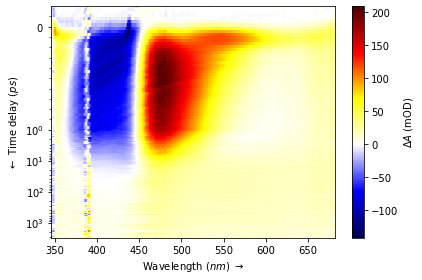

In [8]:
# change the coefficients describing the chirp (from Glotaran fit)

# muZ = (0.638557, 0.376712, -0.0702227)
muE = (0.562611, 0.678523, -0.328499, 0.0581754)
# muHL = (2.61354, 0.241128, -0.0408067)

data_ch = chirp_correct(data, 388, mu=muE, time_offset=0.2)

plot_data(data_ch, D_mul_factor=1e3, symlog=True, z_lim=(None, None), t_lim=(None, None), w_lim=(None, None), fig_size=(6, 4),
          cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=1, linscale=3)

# Lifetime Density Map

Formally, LDM is made by taking an inverse Laplace transform of the data matrix $y(t, \lambda)$
$$W(\tau, \lambda) = \int_0^\infty y(t, \lambda)e^{\frac{t}{\tau}}\mathrm dt$$
In practice, Global Analysis with discrete number of lifetimes ($n\sim100$) using Regularized Regression is performed. In general, Multi-Task Elastic-Net is used which combines $l_1$ (LASSO regression) and $l_2$ (Ridge regression) norms with linear parameter $\rho$.
Amplitudes of LDM are given by
$$\mathbf{W} = \underset{\mathbf{W}}{\mathrm{arg\,min}}\ \left\{\frac{1}{2n_{samples}}\vert\vert \mathbf{XW - Y} \vert\vert_{\mathrm{Fro}}^2 + \alpha\rho\vert\vert \mathbf{W} \vert\vert_{21} + \frac{\alpha(1-\rho)}{2}\vert\vert \mathbf{W} \vert\vert_{\mathrm{Fro}}^2\right\}$$

where $\mathbf X$ is $t\times n$ matrix and consist of folded exponentials (our basis function) and $\mathbf Y$ is $t\times w$, our data matrix. ...Yeah... it does not seem easy, but the minimization is done in [*sci-kit learn* module](https://scikit-learn.org/stable/modules/linear_model.html).

The folded exponentials $c(t)$ are exponentials convoluted with instrument response function $i(t)$ ($*$ denotes [convolution](https://en.wikipedia.org/wiki/Convolution))
Usually, IRF is approximated as gaussian $$i(t) = \frac{1}{\sigma\sqrt{2\pi}}\exp\left(-\frac{t^2}{2\sigma^2}\right) $$ where $\tilde\Delta = \frac{\Delta}{2\sqrt{\ln2}}$ and $\Delta$ is FWHM (full width at half maximum) of the gaussian.

$$c(t) = e^{-kt}\theta(t)*i(t) = \frac12 e^{k\left(\frac{k\sigma^2}{2} - t\right)}\mathrm{erfc}\left(\frac{k\sigma}{\sqrt2} - \frac{t}{\sqrt2\sigma}\right)$$

where $\theta(t)$ is Heaviside step function and $\mathrm{erfc}$ is complementary error function. The columns of $\mathbf X$ are then discrete values of $c(t)$ at different times for range ($n$) of lifetimes (rate constants).

In [13]:
W, data_fit, taus = LDM(data_ch, n_taus=1000, p=0, alpha=5, cv=False)

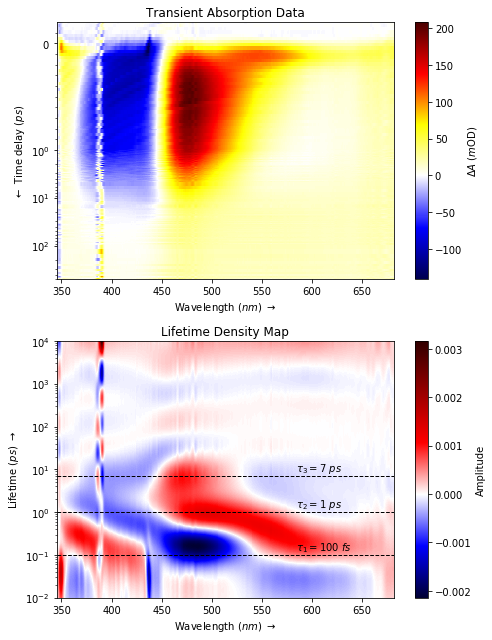

In [17]:
linscale = 2
linthresh = 1

lifetimes = [0.1, 1, 7]
# lifetimes=None

plot_LDA_data(data_ch, taus, W, symlog=True, fig_size=(7, 9),
              cmap='diverging', t_unit='$ps$', filepath=None, dpi=300, linthresh=linthresh, linscale=linscale,
            z_lim=(None, None), t_lim=(None, 500), w_lim=(None, None), lifetimes=lifetimes, tidx_animate=None)

# Make the animation [optional]

-- to be properly implemented...

In [305]:

start = data_ch.times[0]
stop = 500
xs, xe = list(find_nearest_idx(data_ch.times, [start, stop]))
n = int((xe - xs) / 5)
linscale = 2
linthresh = 1
lifetimesZ = (0.141, 1.15, 6.098, 5.457e3)
lifetimesE = (1/4.69142, 1/1.30911, 1/0.145683, 1/0.000179102)
lifetimesHL = (1/0.715826, 1/0.190454, 1/0.00282249)


symlog = x_symlog(start, stop, n, linscale=linscale, linthresh=linthresh)
idxs = find_nearest_idx(data_ch.times, symlog)
# print(idxs.shape, idxs[int(idxs.shape[0]/2)])
print(idxs)


# plot_LDA_data(data_ch, taus, W, symlog=True, fig_size=(10, 7),
#               cmap='diverging', t_unit='$ps$', filepath=None, dpi=300, linthresh=linthresh, linscale=linscale,
#                   zmin=None, t_lim=(data_ch.times[0], stop), w_lim=(350, None), lifetimes=lifetimesE,
#                  tidx_animate=idxs[:-2], FWHM=0.0484420)

for i in range(1, idxs.shape[0]):
    fname = f"animationE/{i:03d}.png"
    
    plot_LDA_data(data_ch, taus, W, symlog=True, fig_size=(10, 7),
              cmap='diverging', t_unit='$ps$', filepath=fname, dpi=300, linthresh=linthresh, linscale=linscale,
                  zmin=None, t_lim=(data_ch.times[0], stop), w_lim=(350, None), lifetimes=lifetimesE,
                 tidx_animate=idxs[:i], FWHM=0.0484420)

[  0   2   3   5   7   8  10  11  13  14  16  18  19  21  22  24  25  27
  29  30  32  34  36  37  39  41  46  55  67  81  99 122 150 170 172 173
 175 178 181 184 189 195 202 211 222 236 253 264 265 266 268 269 271 274
 277]


In [ ]:
# res = Data.from_matrix(data_ch.D - fit.D, data_ch.times, data_ch.wavelengths)

# plot_data(fit, D_mul_factor=1e3,  symlog=True, t0=None, t1=0.5e3, w0=None, w1=None, fig_size=(6, 4),
#           cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=1, linscale=2, zmin=None)

# plot_data(res, D_mul_factor=1e3,  symlog=True, t0=None, t1=0.5e3, w0=None, w1=None, fig_size=(6, 4),
#           cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=1, linscale=2, zmin=None)

In [306]:
# https://stackoverflow.com/questions/46036971/gif-creation-with-imagemagick-convert-images-are-overlapping
delay = 20
dir = "animationE"
command = f"\"C:\\Program Files\\ImageMagick-7.0.2-Q16\\magick.exe\" convert -dispose previous -loop 0 -delay {delay} {dir}\\*.png {dir}\\out.gif"
os.popen(command)